# Project 1 - Housing Data Manipulation with Pandas

#### Data: rich and messy data about housing market
#### Skills: data exploration and data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Project_1_Housing_dataset.csv')

In [3]:
data.shape

(30471, 292)

In [4]:
data.describe() # display basic statistical analysis of all numerical data

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


From the above table, we can see there are 276 columns with nemerical values, so the number of categorical columns are 292-276=16.

According to count results, some rows have missing values. 

Values among different columns has different scales, which need to be normalized for certain machine learning model

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


Only three data types in this dataframe, because pandas can only identify numerical data type. Other data types, like string, date, all belong to object.

In our dataframe, there are 119 columns with float value, 157 columns with integer, and 16 columns with some other types.

In [6]:
data.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011/8/20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011/8/23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011/8/27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011/9/1,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011/9/5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [7]:
data.columns # column names also called features

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [8]:
# data.columns.values  # display all features

### Explore data types

In [9]:
data.dtypes

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

In [10]:
# for i in range(len(data.dtypes)):
#    print (data.dtypes.index[i], data.dtypes[i])  # show each column's data type

In [11]:
type(data.dtypes)

pandas.core.series.Series

In [12]:
num_columns = data.select_dtypes(['int64','float64']).columns  # get all 276 features

In [13]:
num_columns = num_columns.drop('id') # id is not useful for analysis

In [14]:
len(num_columns)

275

In [15]:
type(num_columns)

pandas.core.indexes.base.Index

In [16]:
cat_columns = data.select_dtypes('object').columns

### Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data.

In [17]:
data[['id','price_doc']].head(5)

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


### Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.

In [18]:
data[(data['full_sq']>10) & (data['full_sq']<1500)]  # data.query('full_sq > 10 and full_sq < 1500')

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011/8/20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011/8/23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011/8/27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011/9/1,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011/9/5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015/6/30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015/6/30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015/6/30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015/6/30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


### Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.

In [19]:
data[data['full_sq']<data['life_sq']].index  # data.query('full_sq < life_sq').index

Int64Index([ 1084,  1188,  1822,  1863,  2009,  4385,  6336,  6531,  6993,
             7208,  8101,  9237,  9256,  9482,  9646, 11332, 11711, 11784,
            12569, 13546, 13629, 13797, 14799, 16067, 16116, 16284, 20672,
            21080, 22412, 22611, 22804, 24296, 24428, 26264, 26342, 26363,
            29302],
           dtype='int64')

In [20]:
import numpy as np
data.loc[data[data['full_sq']<data['life_sq']].index, 'life_sq'] = np.NaN

### Check how many rows in life_sq are NAN?

In [21]:
data['life_sq'].isnull().sum()

6420

### The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?

In [22]:
data['product_type'].value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

Investment is more common

In [23]:
data['product_type'].value_counts(normalize=True)

Investment       0.638246
OwnerOccupier    0.361754
Name: product_type, dtype: float64

There are 63.8% investment and 36.2% owner-occupier purchase

### Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.

In [24]:
data.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

In [25]:
# data[['product_type','price_doc']].groupby('product_type').aggregate(np.median)
# data.groupby('product_type').agg({'price_doc':['mean','min','max']})

### Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped

In [26]:
grouped = data.groupby(['product_type', 'state']).size()

In [27]:
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

### Unstack the state index in grouped.

In [28]:
grouped.unstack('state')

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


### Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.

In [29]:
data['room_size'] = data['life_sq']/data['num_room']

### Change the format of timestamp to '%Y-%m-%d'.

In [30]:
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')

In [31]:
data['timestamp']

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
30466   2015-06-30
30467   2015-06-30
30468   2015-06-30
30469   2015-06-30
30470   2015-06-30
Name: timestamp, Length: 30471, dtype: datetime64[ns]

### Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.

In [32]:
data['ts_year'] = data['timestamp'].dt.year
data['ts_dayofweek'] = data['timestamp'].dt.dayofweek  #dt.weekday_name

In [33]:
data['ts_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
30466    2015
30467    2015
30468    2015
30469    2015
30470    2015
Name: ts_year, Length: 30471, dtype: int64

In [34]:
data['ts_dayofweek']

0        5
1        1
2        5
3        3
4        0
        ..
30466    1
30467    1
30468    1
30469    1
30470    1
Name: ts_dayofweek, Length: 30471, dtype: int64

In [35]:
data['timestamp'].dt.weekday

0        5
1        1
2        5
3        3
4        0
        ..
30466    1
30467    1
30468    1
30469    1
30470    1
Name: timestamp, Length: 30471, dtype: int64

In [36]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
data['ts_dayofweek'] = data['ts_dayofweek'].apply(lambda x: days[x])
data['ts_dayofweek']

0          Sat
1         Tues
2          Sat
3        Thurs
4          Mon
         ...  
30466     Tues
30467     Tues
30468     Tues
30469     Tues
30470     Tues
Name: ts_dayofweek, Length: 30471, dtype: object

### Draw histogram of price to see the distribution.

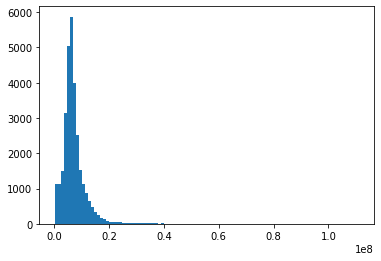

In [37]:
plt.hist(data['price_doc'], bins=100)
plt.show()

### From the above plot, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.

In [38]:
data['log_price'] = np.log(data['price_doc'])

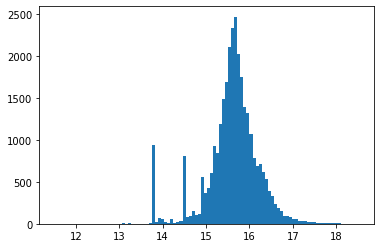

In [39]:
%matplotlib inline
plt.hist(data['log_price'], bins=100)
plt.show()

### Drop the log_price column.

In [40]:
data.drop('log_price', axis=1, inplace=True)

### Save the dataframe to new_housing_data.csv file

In [41]:
data.to_csv('new_housing_data.csv',index=True)

In [42]:
#  !wc -l ./housing_dataset.csv  
# this is used to check if the data is loaded correctly.